Download libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [38]:
data = pd.read_csv('/content/all_stocks_5yr.csv')
print(data.shape)
print(data.sample(10))

(619040, 7)
              date    open    high      low    close    volume  Name
349639  2017-01-11   37.33   37.82   37.170   37.750    706912   LNT
478940  2016-10-20  368.92  373.96  368.300  371.240    346406  REGN
1599    2014-06-17   92.31   92.70   91.800   92.080  29726347  AAPL
129172  2017-03-02  152.62  152.62  150.620  150.840   1060701   CMI
26018   2016-06-08   39.96   40.45   39.690   40.380    978456   AIV
361834  2015-06-18   27.52   27.82   27.520   27.730   4093614   MAS
203048  2017-06-13   62.62   62.92   62.140   62.630   4257749  ESRX
241838  2014-06-20  119.70  120.10  119.440  119.550   2210232    GD
283455  2015-03-03   29.24   29.24   28.815   29.185   1833518   HRL
145072  2015-08-26   25.28   25.74   24.705   25.680  54783233  CSCO


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [40]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


Data Analysis

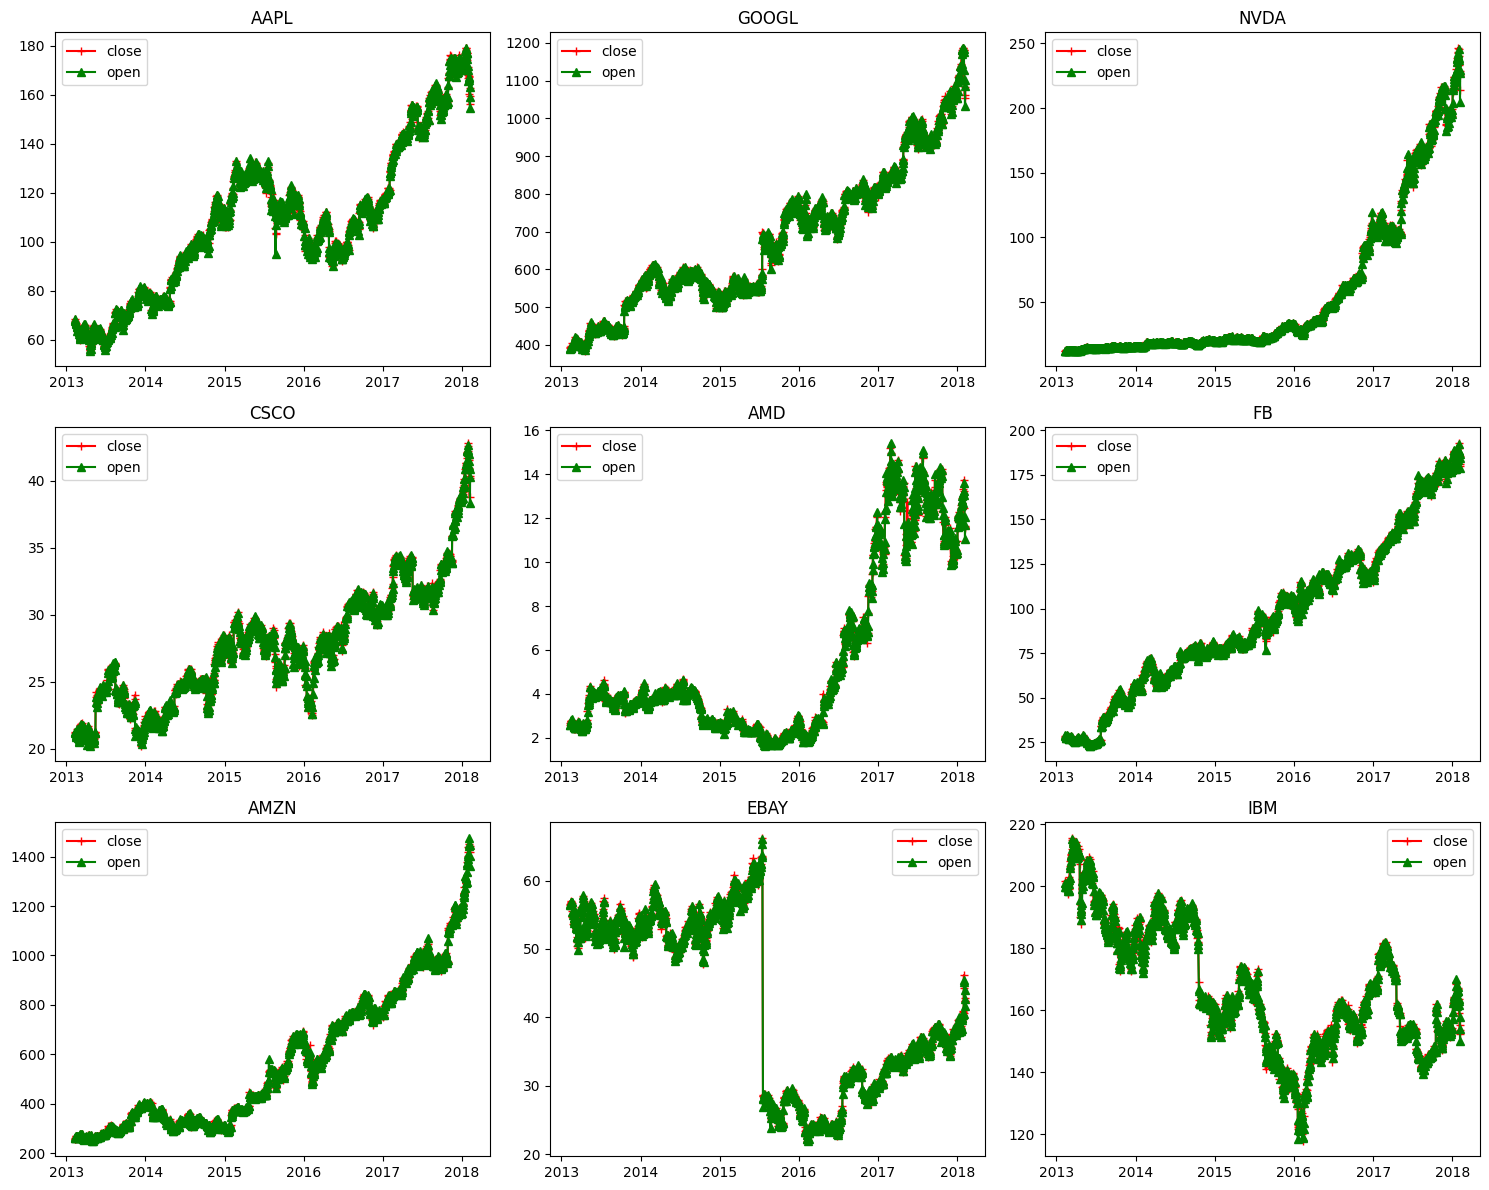

In [41]:
companies_to_plot = ["AAPL", "GOOGL", "NVDA", "CSCO", "AMD", "FB", "AMZN", "EBAY", "IBM"]  # Specify the companies you want

plt.figure(figsize=(15, 12))
num_rows = 3
num_cols = 3

for index, company in enumerate(companies_to_plot, 1):  # Iterate over the chosen companies
    plt.subplot(num_rows, num_cols, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

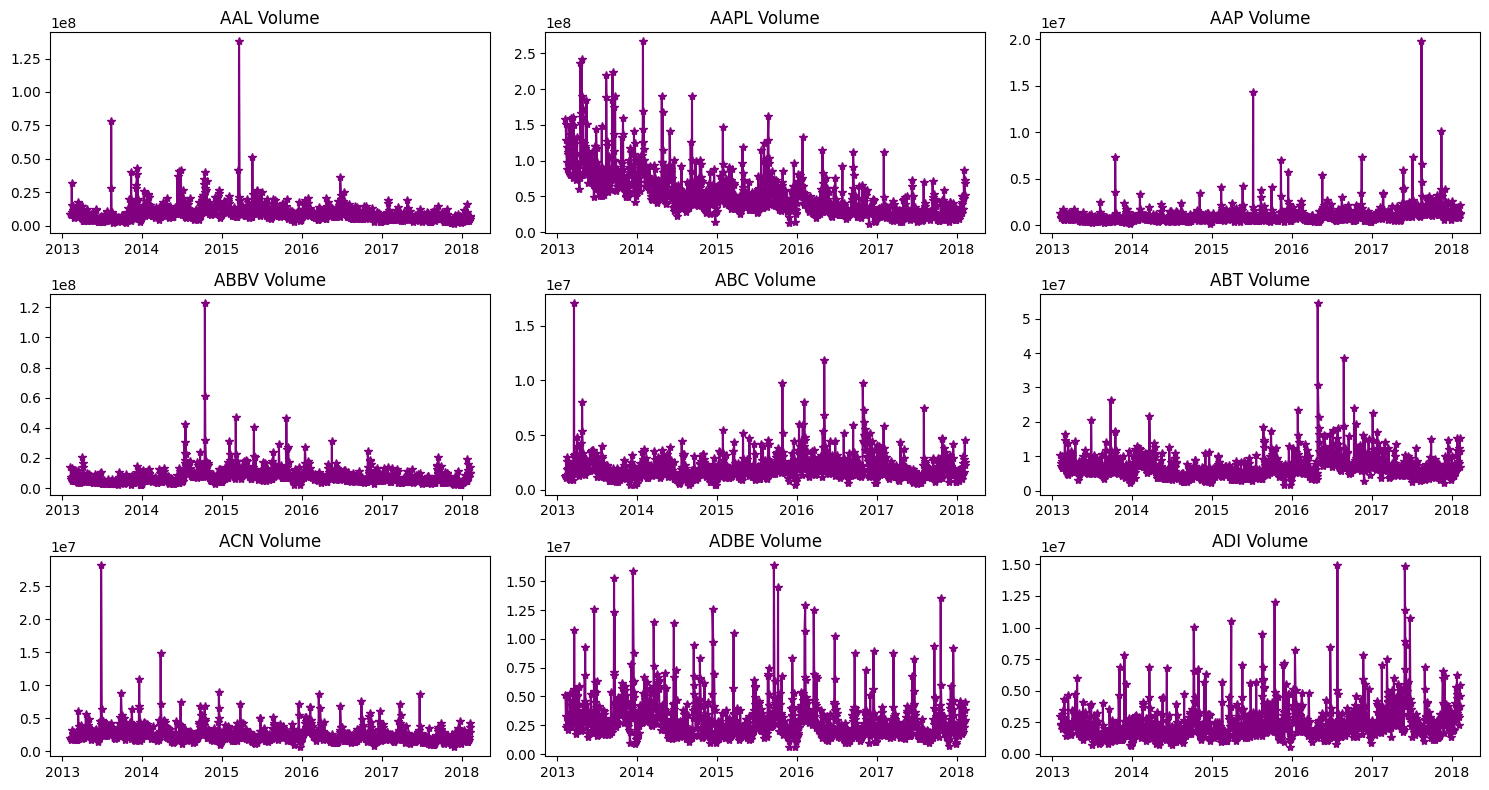

In [42]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['volume'], c='purple', marker='*')
	plt.title(f"{company} Volume")
	plt.tight_layout()


2013-2018 AAPL Stocks

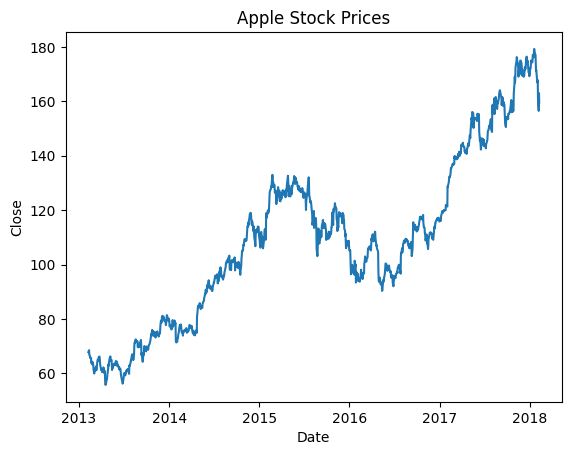

In [43]:
apple = data[data['Name'] == 'AAPL']
apple.head()
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]

plt.plot(apple['date'], apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [44]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [47]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0844
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0114
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0095
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0082
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0079
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0074
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0069
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0082
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0071
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0072


In [48]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 483ms/step
MSE 55.13546270363309
RMSE 7.425325764142142


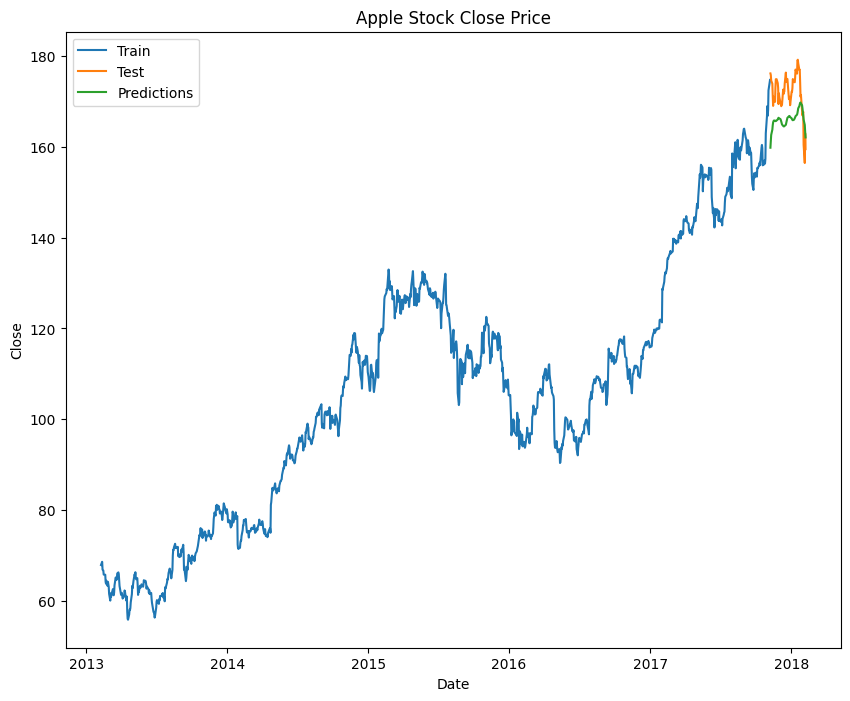

In [49]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
